## 1. Membaca file ‘bike_buyers_clean.csv’ sebagai filename lalu dimasukkan sebagai dataframe.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, mean_squared_error
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [ ]:
filename =str("bike_buyers_clean.csv")

In [ ]:
dataframe = read_csv(filename)
dataframe

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


## 2. Melakukan Data Preparation

In [ ]:
dataframe.shape

(1000, 13)

In [ ]:
dataframe.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

## 3. Membuat Kurva/Plotting terhadap dataframe

<AxesSubplot: >

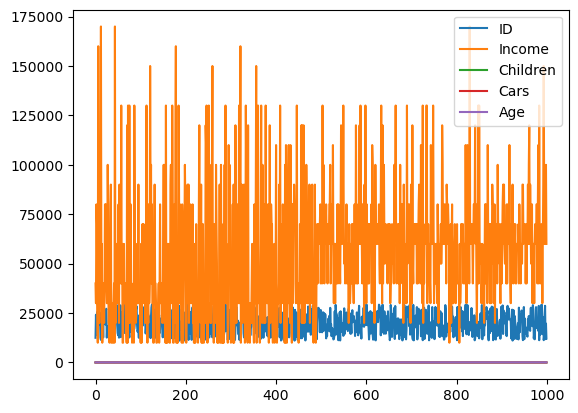

In [ ]:
dataframe.plot()

Grafik yang menampilkan dataset ID,Income,Children,Cars, dan Age

<AxesSubplot: xlabel='Marital Status', ylabel='count'>

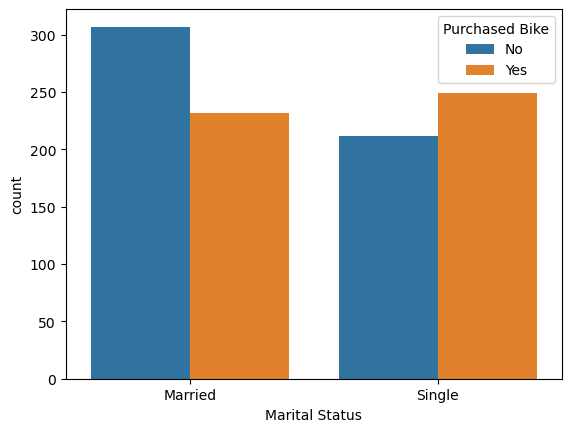

In [ ]:
sns.countplot(data=dataframe, x='Marital Status', hue='Purchased Bike')

Grafik yang menampilkan dataset Marital_Status dengan Pembelian Sepeda

<AxesSubplot: xlabel='Purchased Bike', ylabel='Income'>

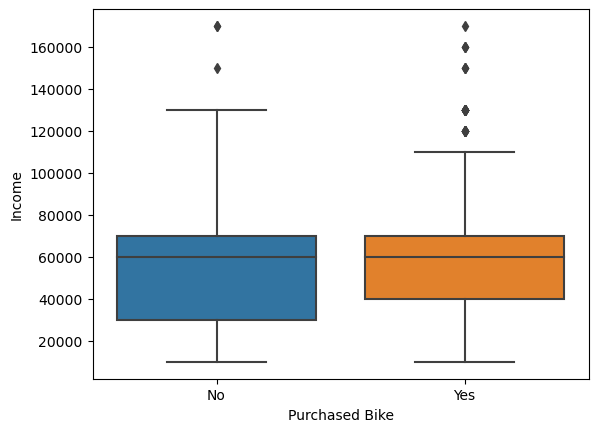

In [ ]:
sns.boxplot(x=dataframe['Purchased Bike'],y=dataframe['Income'], data=dataframe)

Grafik yang menampilkan dataset Income dengan Pembelian Sepeda

##  Membuat 3 dataset yang dapat mengatasi permasalahan categorical variable.

In [ ]:
data_bike_dummies = pd.get_dummies(dataframe)
data_bike_dummies

,ID,Income,Children,Cars,Age,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,Education_Bachelors,...,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific,Purchased Bike_No,Purchased Bike_Yes
0,12496,40000,1,0,42,1,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
1,24107,30000,3,1,43,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,14177,80000,5,2,60,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,24381,70000,0,1,41,0,1,0,1,1,...,0,0,0,0,1,0,0,1,0,1
4,25597,30000,0,0,36,0,1,0,1,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,60000,2,2,54,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
996,28672,70000,4,0,35,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
997,11809,60000,2,0,38,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,1
998,19664,100000,3,3,38,0,1,0,1,1,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
ordinal_encoder = OrdinalEncoder()
data_bike_ordinal=dataframe.copy()
data_bike_ordinal[['Marital Status','Gender','Education','Occupation','Home Owner','Commute Distance','Region','Purchased Bike']] = ordinal_encoder.fit_transform(data_bikeoe[['Marital Status','Gender','Education','Occupation','Home Owner','Commute Distance','Region','Purchased Bike']])
data_bike_ordinal

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0.0,0.0,40000,1,0.0,4.0,1.0,0,0.0,0.0,42,0.0
1,24107,0.0,1.0,30000,3,3.0,0.0,1.0,1,0.0,0.0,43,0.0
2,14177,0.0,1.0,80000,5,3.0,3.0,0.0,2,3.0,0.0,60,0.0
3,24381,1.0,1.0,70000,0,0.0,3.0,1.0,1,4.0,2.0,41,1.0
4,25597,1.0,1.0,30000,0,0.0,0.0,0.0,0,0.0,0.0,36,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,0.0,1.0,60000,2,2.0,3.0,1.0,2,3.0,1.0,54,1.0
996,28672,1.0,1.0,70000,4,1.0,3.0,1.0,0,3.0,1.0,35,1.0
997,11809,0.0,1.0,60000,2,0.0,4.0,1.0,0,0.0,1.0,38,1.0
998,19664,1.0,1.0,100000,3,0.0,1.0,0.0,3,1.0,1.0,38,0.0


In [ ]:
data_bike_drop=dataframe.copy()
data_bike_drop.drop('Marital Status',axis=1, inplace=True)
data_bike_drop.drop('Gender',axis=1, inplace=True)
data_bike_drop.drop('Education',axis=1, inplace=True)
data_bike_drop.drop('Occupation',axis=1, inplace=True)
data_bike_drop.drop('Home Owner',axis=1, inplace=True)
data_bike_drop.drop('Commute Distance',axis=1, inplace=True)
data_bike_drop.drop('Region',axis=1, inplace=True)


label_encoder = LabelEncoder()
data_bike_drop['Purchased Bike'] = label_encoder.fit_transform(data_bike_drop['Purchased Bike'])
data_bike_drop

,ID,Income,Children,Cars,Age,Purchased Bike
0,12496,40000,1,0,42,0
1,24107,30000,3,1,43,0
2,14177,80000,5,2,60,0
3,24381,70000,0,1,41,1
4,25597,30000,0,0,36,1
...,...,...,...,...,...,...
995,23731,60000,2,2,54,1
996,28672,70000,4,0,35,1
997,11809,60000,2,0,38,1
998,19664,100000,3,3,38,0


## Memisahkan train_set dan test_set menjadi 0.67 dan 0.33

In [ ]:
test_size=0.33
seed=42

array1=data_bike_dummies.to_numpy()
X_train_dummies=array1[:,:29]
y_train_dummies=array1[:,30]
X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies=train_test_split(X_train_dummies,y_train_dummies,test_size=test_size,random_state=seed)

array2=data_bike_ordinal.to_numpy()
X_train_ordinal=array2[:,:12]
y_train_ordinal=array2[:,12]
X_train_ordinal, X_test_ordinal, y_train_ordinal, y_test_ordinal=train_test_split(X_train_ordinal,y_train_ordinal,test_size=test_size,random_state=seed)

array3=data_bike_drop.to_numpy()
X_train_drop=array3[:,:5]
y_train_drop=array3[:,5]
X_train_drop, X_test_drop, y_train_drop, y_test_drop=train_test_split(X_train_drop,y_train_drop,test_size=test_size,random_state=seed)

## Membuat 3 model menggunakan algoritma Logistic Regressio, kemudian melatih model menggunakan data train.

In [ ]:
log_reg_dummies=LogisticRegression()
log_reg_dummies.fit(X_train_dummies, y_train_dummies)

log_reg_ordinal=LogisticRegression()
log_reg_ordinal.fit(X_train_ordinal, y_train_ordinal)

log_reg_drop=LogisticRegression()
log_reg_drop.fit(X_train_drop, y_train_drop)

LogisticRegression()

## Menampilkan semua hasil precision score, recall score dan classification report, MSE.

In [ ]:
y_pred_dummies=log_reg_dummies.predict(X_test_dummies)
print("Precision Score :",precision_score(y_test_dummies, y_pred_dummies))
print("Recall Score :",recall_score(y_test_dummies, y_pred_dummies))
print("Precission Score :")
print(classification_report(y_test_dummies, y_pred_dummies))
print("MSE :",mean_squared_error(y_test_dummies, y_pred_dummies))

Precision Score : 0.6066666666666667
Recall Score : 0.558282208588957
Precission Score :
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       167
           1       0.61      0.56      0.58       163

    accuracy                           0.60       330
   macro avg       0.60      0.60      0.60       330
weighted avg       0.60      0.60      0.60       330

MSE : 0.396969696969697


In [ ]:
y_pred_ordinal=log_reg_ordinal.predict(X_test_ordinal)
print("Precision Score :",precision_score(y_test_ordinal, y_pred_ordinal))
print("Recall Score :",recall_score(y_test_ordinal, y_pred_ordinal))
print("Precission Score :")
print(classification_report(y_test_ordinal, y_pred_ordinal))
print("MSE :",mean_squared_error(y_test_ordinal, y_pred_ordinal))

Precision Score : 0.6287878787878788
Recall Score : 0.50920245398773
Precission Score :
              precision    recall  f1-score   support

         0.0       0.60      0.71      0.65       167
         1.0       0.63      0.51      0.56       163

    accuracy                           0.61       330
   macro avg       0.61      0.61      0.60       330
weighted avg       0.61      0.61      0.61       330

MSE : 0.39090909090909093


In [ ]:
y_pred_drop=log_reg_drop.predict(X_test_drop)
print("Precision Score :",precision_score(y_test_drop, y_pred_drop))
print("Recall Score :",recall_score(y_test_drop, y_pred_drop))
print("Precission Score :")
print(classification_report(y_test_drop, y_pred_drop))
print("MSE :",mean_squared_error(y_test_drop, y_pred_drop))

Precision Score : 0.5958904109589042
Recall Score : 0.5337423312883436
Precission Score :
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       167
           1       0.60      0.53      0.56       163

    accuracy                           0.59       330
   macro avg       0.59      0.59      0.59       330
weighted avg       0.59      0.59      0.59       330

MSE : 0.4090909090909091


## Mencari  Hyperparameter yang terbaik dengan 3 parameter

In [ ]:
parameter={
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-5, 8, 15),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
grid_search=GridSearchCV(log_reg_ordinal,parameter,scoring='accuracy',cv=5)
grid_search.fit(X_train_ordinal, y_train_ordinal)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
print(grid_search.best_params_)

{'C': 3.727593720314938, 'penalty': 'l2', 'solver': 'liblinear'}
